<a href="https://colab.research.google.com/github/radhakrishnan-omotec/wildlife-repo/blob/main/2e_Wildlife_Detection_through_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Algorithm for Wildlife Animals Identification

In notebook we will be working with the Oregon Wildlife [dataset](https://www.kaggle.com/virtualdvid/oregon-wildlife/kernels) created by [David Molina](https://www.kaggle.com/virtualdvid) with a google scrapper.It constains about 14.000 pictures of 19 different wildlife species such as Deers, Cougars, Grey Wolfs and so on.

Wouldn't it be fun to have a app that tells you what animals are you observing in the nature when you are camping or hiking? This project may be a first step to create this app.

We aim to generate a model that scans an image and identify what is the animal species on the screen. To achieve this goal we will make use of **Convolutional Neural Networks.** <br><br>

## How does a Convolutional Neural Network function ?  

[deep.ai](https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network): CNNs process images as volumes, receiving a color image as a rectangular box where the width and height are measure by the number of pixels associated with each dimension, and the depth is three layers deep for each color (RGB). These layers are called channels. Within each pixel of the image, the intensity of the R, G, or B is expressed by a number. That number is part of three, stacked two-dimensional matrices that make up the image volume and form the initial data that is fed to into the convolutional network. The network then begins to filter the image by grouping squares of pixels together and looking for patterns, performing what is known as a convolution. This process of pattern analysis is the foundation of CNN functions.<br><br>


![CNN](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)


### Libraries
- numpy (Linear Algebra)
- pandas (Data Manipulation and Analysis)
- glob (File Manipulation)
- os (File Manipulation)
- regex (text patterns)
- random (sampling data)
- PIL (image processing)
- Sklearn (Evaluation Metrics)
- Pytorch (Deep Learning)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 1](#step1): Import Libraries and Load the Dataset
* [Step 2](#step2): Create a CNN to Classify Wild Animals (from Scratch)
* [Step 3](#step3): Create a CNN to Classify Wild Animals (using Transfer Learning)
* [Step 4](#step3): Test the model and create an Algorithm

We first mount the folder on the google drive with the dataset.

In [9]:
!git clone https://github.com/radhakrishnan-omotec/wildlife-repo.git

Cloning into 'wildlife-repo'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 7.24 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [20]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp /content/wildlife-repo/kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d virtualdvid/oregon-wildlife

Dataset URL: https://www.kaggle.com/datasets/virtualdvid/oregon-wildlife
License(s): unknown
100% 4.53G/4.55G [00:52<00:00, 73.7MB/s]
100% 4.55G/4.55G [00:53<00:00, 92.1MB/s]


In [22]:
from zipfile import ZipFile
file_name = 'oregon-wildlife.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


<a id='step1'></a>
## Step 1: Import Dataset and Libraries

Our fist step is to import all the libraries used in this project.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import os
import re
import random
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
from skimage import io
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
from torch.utils.data import (Dataset, DataLoader)  # Gives easier dataset managment and creates mini batches
from torchvision.datasets import ImageFolder
import torchvision.models as models

## Visualize the data

First lets examine the files.
- Which are the species?
- How many pictures do we have from each animal?



In [24]:
animals_list = os.listdir("/content/oregon_wildlife/oregon_wildlife")
animals_file_list = []

for i in range(len(animals_list)):

  animals_file_list.append(os.listdir(str("/content/oregon_wildlife/oregon_wildlife/" + animals_list[i])))
  n = len(animals_file_list[i])
  print('There are', n , animals_list[i] , 'images.')


There are 698 seals images.
There are 701 nutria images.
There are 759 red_fox images.
There are 728 virginia_opossum images.
There are 735 columbian_black-tailed_deer images.
There are 748 bald_eagle images.
There are 730 gray_wolf images.
There are 736 coyote images.
There are 588 ringtail images.
There are 696 bobcat images.
There are 717 canada_lynx images.
There are 660 elk images.
There are 728 raccoon images.
There are 718 black_bear images.
There are 764 deer images.
There are 680 cougar images.
There are 577 mountain_beaver images.
There are 668 gray_fox images.
There are 656 raven images.
There are 726 sea_lions images.


Apparently we have a balanced dataset,  which means we have a similar 9but not equal) proportion of images of animals from each species.
To have a more real notion let's visualize the animals.






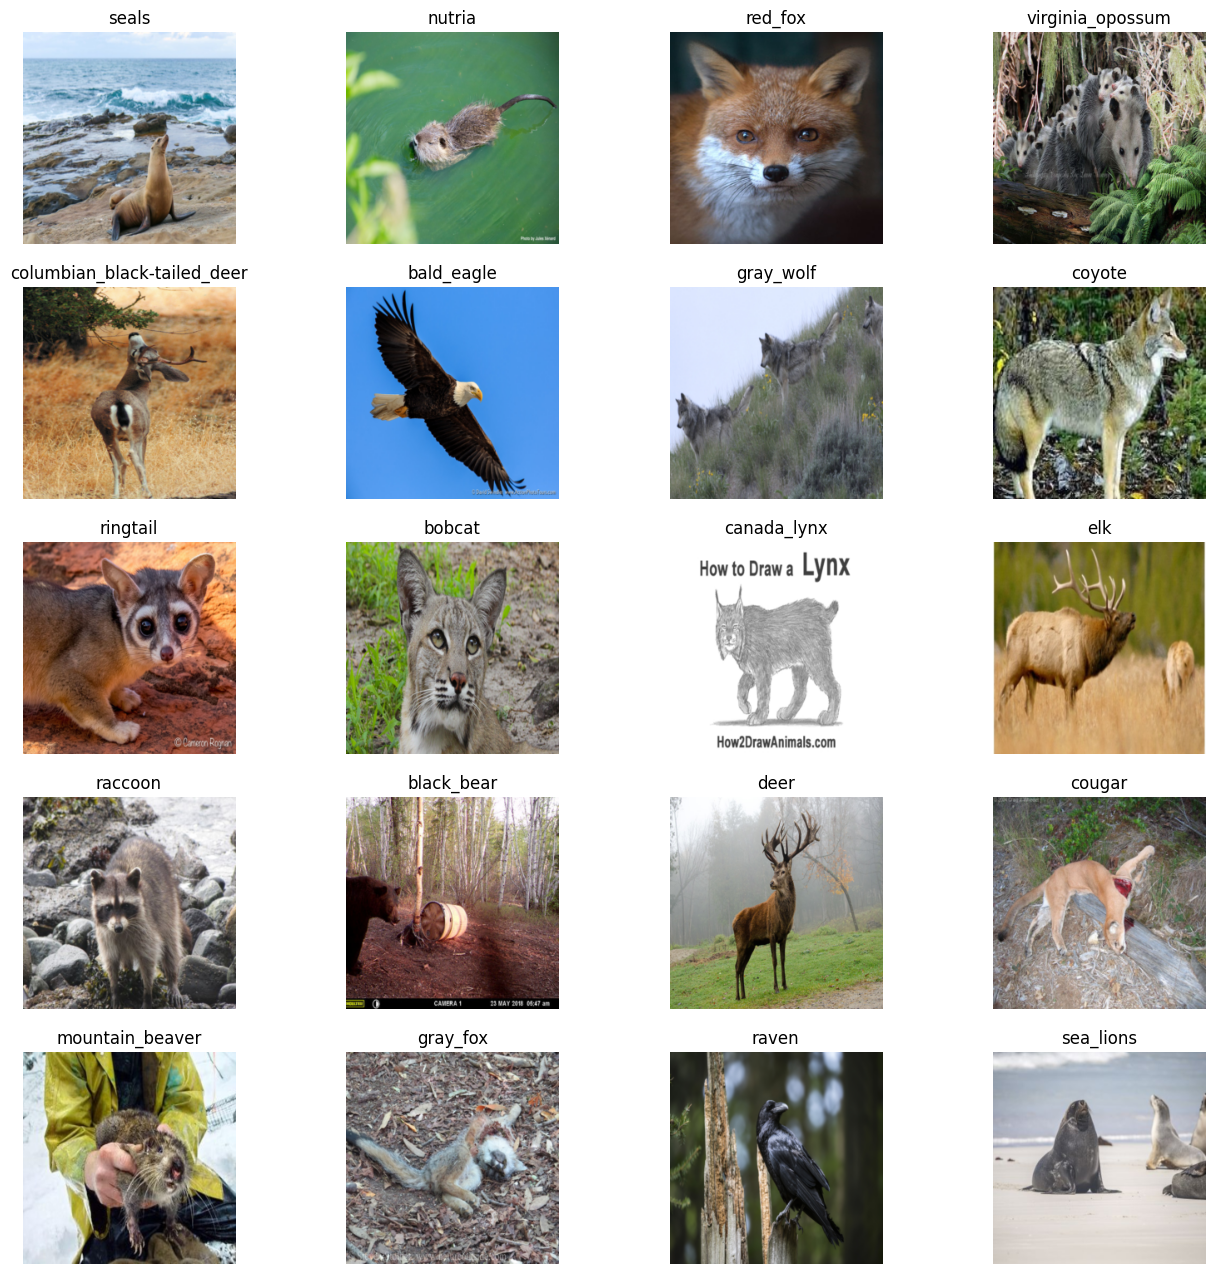

In [25]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5

for i in range(1, len(animals_list)+1):
    img = mpimg.imread(str("/content/oregon_wildlife/oregon_wildlife/"+ animals_list[i-1] + "/"+ animals_file_list[i-1][0]))
    compose = transforms.Compose([transforms.ToPILImage(),transforms.Resize((256,256))])
    img = compose(img)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(animals_list[i-1])
    plt.imshow(img)
plt.show()

Very beautiful animals right?

## Load Data

Now we will make use of Pytorch elements `transform`, `ImageFolder`, `DataLoader` to load the data.

The next steps will be the following.

1. Create a dataframe with the name of each file, the animal and the absolute path.
2. Select files that will further be in the train, test and validation sets.
3. Perform transformation in the data such as reshaping, croping and rotation that will allow the images that are from different sizes to be analyzed together.
4. Load the datasets using the DataLoader function, that will transform the images in tensors that will be analysed by the CNN.

In [26]:
dir = '/content/oregon_wildlife/oregon_wildlife'
files = [f for f in glob(dir + "**/**", recursive=True)] # create a list will allabsolute path of all files

In [27]:
df_animals = pd.DataFrame({"file_path":files}) # transform in a dataframe
df_animals['animal'] = df_animals['file_path'].str.extract('/oregon_wildlife/(.+)/') # extract the name of the animal
df_animals['file'] = df_animals['file_path'].str.extract('oregon_wildlife/.+/(.+)') # extrat the file name
df_animals = df_animals.dropna() # drop nas
print("dataframe for animals Completed")

dataframe for animals Completed


Now we split the data in train, test and validation (inside the dataframe).

In [28]:
animal_set = set(df_animals['animal'])
train_val_test_list = [0,1,2]
train_val_weights = [70,15,15]
df_animals['train_val_test'] = 'NA'

for an in animal_set:
  n = sum(df_animals['animal'] == an) # count the number of animals
  train_val_test = random.choices(train_val_test_list, weights= train_val_weights,  k=n)
  df_animals.loc[df_animals['animal'] == an, 'train_val_test'] = train_val_test

Now we will create the dictonary `transform`. it will be used to transform the train, test and validation datasets.
We will apply different transformations on the train and test/validation datasets. Data augmentation is used in the trainning dataset to avoid overfitting, that means to avoid the a very good performance on the trainning set but a bed performane on the validation and testing datasets (bed generalization). The methods used were:
- Flipping the images horizontally
- Random Cropping: Extract randomly a 224 × 224 pixels section from 256 × 256 pixels
- RandomRotation: Randomly rotate the image by 10 degrees.


In [29]:
transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}


We create an auxiliary function to make sure the data is correctly splited among train, test and validation.   

In [30]:
def check_train(path):
    return (df_animals[df_animals['file_path'] == path].train_val_test == 0).bool

def check_valid(path):
    return (df_animals[df_animals['file_path'] == path].train_val_test == 1).bool

def check_test(path):
    return (df_animals[df_animals['file_path'] == path].train_val_test == 2).bool

#### Load the dataset

In [31]:
# Reading Dataset
image_datasets = {
    'train' : ImageFolder(root= dir, transform=transform['train'], is_valid_file=check_train),
    'valid' : ImageFolder(root=dir, transform=transform['valid'], is_valid_file=check_valid),
    'test' : ImageFolder(root=dir, transform=transform['test'], is_valid_file=check_test)
}

In [32]:
num_workers = 0
batch_size = 20

loaders_scratch = {
    'train' : DataLoader(image_datasets['train'], shuffle = True, batch_size = batch_size),
    'valid' : DataLoader(image_datasets['valid'], shuffle = True, batch_size = batch_size),
    'test' : DataLoader(image_datasets['test'], shuffle = True, batch_size = batch_size)
}

#### USE GPU

In [33]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
print ("cuda availability : ",use_cuda)

cuda availability :  True


<a id='step2'></a>
## Step 2: Create a CNN to Classify Wild Animals (from Scratch)

We create a CNN that reveives tensors of `224 x 224 x 3` dimensions (that's how we prepared the dataset).

Some of the elements of our network built from scratch.
- Five convolutional layers. The last will return a tensor of `128 x 256, x 3` dimensions. Padding equals 1.
- A relu function applied after every convolutional iteration.
- A pooling function applied after every convolutional iteration.
- Two dropout layers to avoid overffiting.
- Two fully connected layers.  




 that will transform `128 x 256 x 3`
- relu


In [34]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 224 x 224 x 3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 122 x 122 x 16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 56 x 56 x 32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # convolutional layer (sees 28 x 28 x 64 tensor)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        # convolutional layer (sees 14 x 14 x 128 tensor)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)

        # linear layer (64 * 4 * 4 -> 133)
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        # linear layer (133 -> 133)
        self.fc2 = nn.Linear(512, 20)


    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.conv_bn2(self.pool(F.relu(self.conv1(x))))
        x = self.conv_bn3(self.pool(F.relu(self.conv2(x))))
        x = self.conv_bn4(self.pool(F.relu(self.conv3(x))))
        x = self.conv_bn5(self.pool(F.relu(self.conv4(x))))
        x = self.conv_bn6(self.pool(F.relu(self.conv5(x))))
        # flatten image input
        x = x.view(-1, 256 * 7 * 7)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (conv_bn1): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6

### LOAD MODEL WITHOUT TRAINING

In [37]:

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('/content/gdrive/MyDrive/WILDLIFE-PROJECT/model_scratch_wildlife.pt'))

<All keys matched successfully>

---

### Optimzer and a loss function:

We define an optmizer and a loss function.

- **loss function**: Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. From the [ml-cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

- **optimizer**: Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate. From [wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

In [20]:

# specify loss function
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

In [21]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    print("Train Start: returns trained model")
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf

    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + (1 / (batch_idx + 1)) * (loss.data - train_loss)


        ######################
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)


        # print training/validation statistics
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))

        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), '/content/gdrive/MyDrive/model_scratch.pt')
            valid_loss_min = valid_loss

    # return trained model
    return model

# train the model
model_scratch = train(1, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')
print("Train End: returns trained model")

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('/content/gdrive/MyDrive/model_scratch.pt'))

Train Start: returns trained model


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch: 1 	Training Loss: 2.596812 	Validation Loss: 2.063224
Validation loss decreased (inf --> 2.063224).  Saving model ...
Train End: returns trained model


<All keys matched successfully>

In [22]:

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('/content/gdrive/MyDrive/WILDLIFE-PROJECT/model_scratch_wildlife.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [23]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    if torch.cuda.is_available():
      model.cuda()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 0.541297


Test Accuracy: 83% (11646/14013)


Predicted Animal: bald eagle 
True Animal: bald_eagle


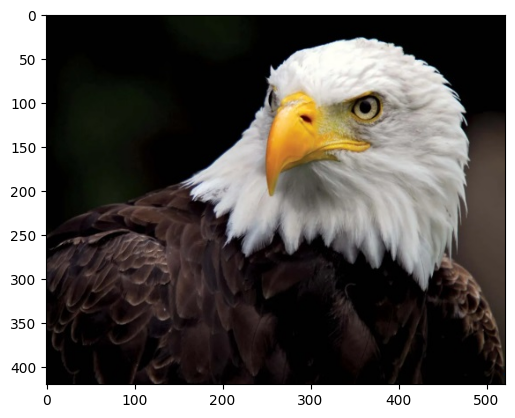

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from torchvision import transforms
from torch.autograd import Variable
import random
import re
from PIL import Image

# create a list with a class names
class_names = image_datasets['train'].classes
class_names = [re.sub("\d{3}.", "", item) for item in class_names]
class_names = [re.sub("_", " ", item) for item in class_names]

def predict_breed(img):

    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize]
    )

    img_tensor = preprocess(img).float()
    img_tensor.unsqueeze_(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img_tensor = Variable(img_tensor) #The input to the network needs to be an autograd Variable

    if use_cuda:
        img_tensor = Variable(img_tensor.cuda())

    model_scratch.eval()
    output = model_scratch(img_tensor) # Returns a Tensor of shape (batch, num class labels)
    output = output.cpu()

    # Our prediction will be the index of the class label with the largest value.
    predict_index = output.data.numpy().argmax()

    predicted_breed = class_names[predict_index]
    true_breed = image_datasets['train'].classes[predict_index]

    return (predicted_breed, true_breed)

# Input image path
image_path = "/content/gdrive/MyDrive/WILDLIFE-PROJECT/bald_eagle.jpg"  # Specify the path to your image

# Load the image
img = Image.open(image_path)

predicted_breed, true_breed = predict_breed(img)
print("Predicted Animal:", predicted_breed, "\nTrue Animal:", true_breed)

# Display the image
imgplot = plt.imshow(img)
plt.show()

<a id='step Final'></a>
## Step Final: Using Webcam input, use CNN to Classify Wild Animals

Using Webcam input, use CNN to Classify Wild Animals.

In [ ]:
import cv2
from google.colab.output import eval_js
from IPython.display import display, Javascript, Image
import numpy as np
import shutil
import base64

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Convert JS image data to OpenCV format
    img = cv2.imdecode(np.frombuffer(base64.b64decode(data.split(',')[1]), np.uint8), cv2.IMREAD_COLOR)
    # Save image
    cv2.imwrite(filename, img)

    return filename

try:
    filename = take_photo('/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo.jpg')  # Saving to Google Drive
    print('Saved to {}'.format(filename))

    # Show the image which was just taken
    display(Image(filename))

    # Move the file to the desired location
    shutil.move(filename, '/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo.jpg')
    print('Moved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo.jpg')
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

---

<IPython.core.display.Javascript object>

Saved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg


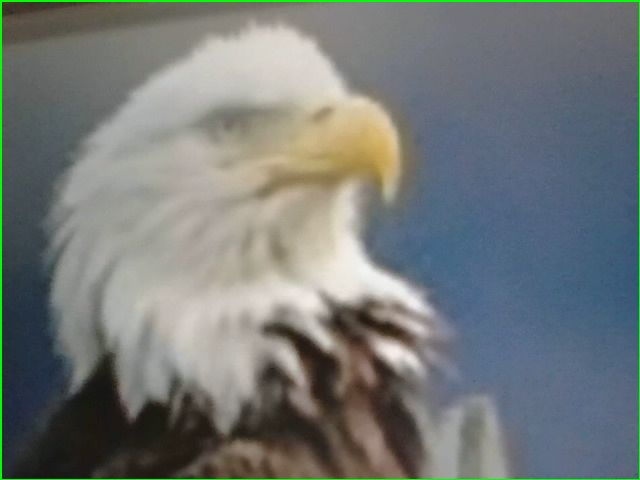

Moved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg


In [40]:
import cv2
from google.colab.output import eval_js
from IPython.display import display, Javascript, Image
import numpy as np
import shutil
import base64

def find_closest_object(contours, min_area=100):
    """
    Finds the contour with the largest area among contours with area greater than min_area.

    Args:
        contours: List of contours.
        min_area: Minimum area threshold.

    Returns:
        The contour with the largest area among contours with area greater than min_area.
    """
    max_area = min_area
    closest_contour = None

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area and area > max_area:
            max_area = area
            closest_contour = contour

    return closest_contour

def draw_contour_box(image, contour):
    """
    Draws a bounding box around the contour on the image.

    Args:
        image: Input image.
        contour: Contour to draw the bounding box around.

    Returns:
        The image with the bounding box drawn.
    """
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Convert JS image data to OpenCV format
    img = cv2.imdecode(np.frombuffer(base64.b64decode(data.split(',')[1]), np.uint8), cv2.IMREAD_COLOR)

    # Convert the image to grayscale for contour detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Threshold the image
    _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the largest area
    closest_contour = find_closest_object(contours)

    # If a contour is found, draw a bounding box around it
    if closest_contour is not None:
        img_with_box = draw_contour_box(img.copy(), closest_contour)

        # Save image with box drawn
        cv2.imwrite(filename, img_with_box)
        print('Saved to {}'.format(filename))
    else:
        print('No objects detected.')
        return None

    return filename

try:
    filename = take_photo('/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg')  # Saving to Google Drive
    if filename:
        # Show the image which was just taken with the box drawn
        display(Image(filename))
        print('Moved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg')
        # Move the file to the desired location
        shutil.move(filename, '/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg')
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

Predicted Animal: bald eagle 
True Animal: bald_eagle


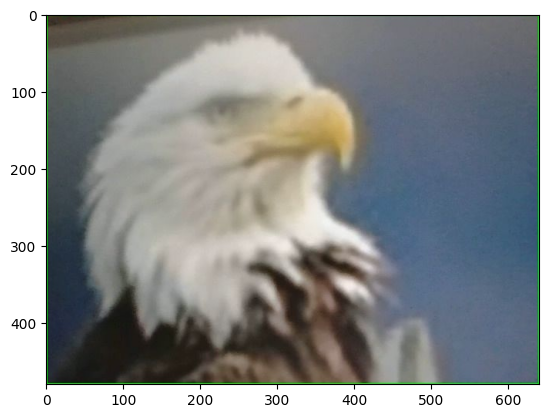

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from torchvision import transforms
from torch.autograd import Variable
import random
import re
from PIL import Image

# create a list with a class names
class_names = image_datasets['train'].classes
class_names = [re.sub("\d{3}.", "", item) for item in class_names]
class_names = [re.sub("_", " ", item) for item in class_names]

def predict_breed(img):

    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize]
    )

    img_tensor = preprocess(img).float()
    img_tensor.unsqueeze_(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img_tensor = Variable(img_tensor) #The input to the network needs to be an autograd Variable

    if use_cuda:
        img_tensor = Variable(img_tensor.cuda())

    model_scratch.eval()
    output = model_scratch(img_tensor) # Returns a Tensor of shape (batch, num class labels)
    output = output.cpu()

    # Our prediction will be the index of the class label with the largest value.
    predict_index = output.data.numpy().argmax()

    predicted_breed = class_names[predict_index]
    true_breed = image_datasets['train'].classes[predict_index]

    return (predicted_breed, true_breed)

# Input image path
image_path = "/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg"  # Specify the path to your image

# Load the image
img = Image.open(image_path)

predicted_breed, true_breed = predict_breed(img)
print("Predicted Animal:", predicted_breed, "\nTrue Animal:", true_breed)

# Display the image
imgplot = plt.imshow(img)
plt.show()

---

Predicted Animal: red fox 
True Animal: red_fox


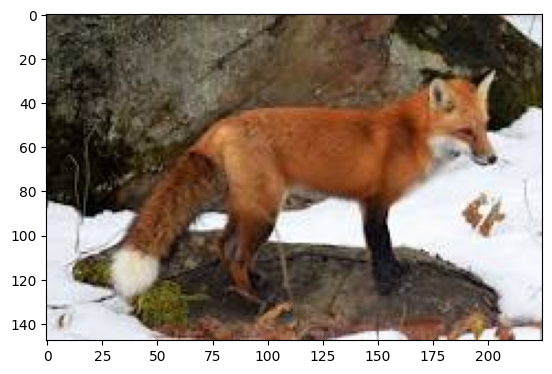

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from torchvision import transforms
from torch.autograd import Variable
import random
import re
from PIL import Image

# create a list with a class names
class_names = image_datasets['train'].classes
class_names = [re.sub("\d{3}.", "", item) for item in class_names]
class_names = [re.sub("_", " ", item) for item in class_names]

def predict_breed(img):

    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize]
    )

    img_tensor = preprocess(img).float()
    img_tensor.unsqueeze_(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.
    img_tensor = Variable(img_tensor) #The input to the network needs to be an autograd Variable

    if use_cuda:
        img_tensor = Variable(img_tensor.cuda())

    model_scratch.eval()
    output = model_scratch(img_tensor) # Returns a Tensor of shape (batch, num class labels)
    output = output.cpu()

    # Our prediction will be the index of the class label with the largest value.
    predict_index = output.data.numpy().argmax()

    predicted_breed = class_names[predict_index]
    true_breed = image_datasets['train'].classes[predict_index]

    return (predicted_breed, true_breed)

# Input image path
image_path = "/content/gdrive/MyDrive/WILDLIFE-PROJECT/red_fox.jpeg"  # Specify the path to your image

# Load the image
img = Image.open(image_path)

predicted_breed, true_breed = predict_breed(img)
print("Predicted Animal:", predicted_breed, "\nTrue Animal:", true_breed)

# Display the image
imgplot = plt.imshow(img)
plt.show()

<a id='step-LAST'></a>
## Complete Code to Capture input image from Webcam and then Predict the category

<IPython.core.display.Javascript object>

Saved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg
Predicted Animal: elk 
True Animal: elk


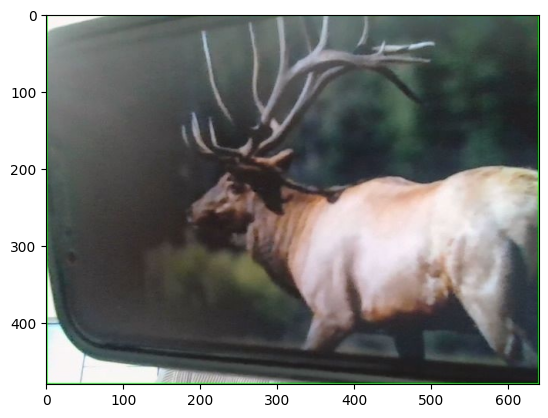

Moved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg


In [50]:
import cv2
from google.colab.output import eval_js
from IPython.display import display, Javascript, Image
import numpy as np
import shutil
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import transforms
from torch.autograd import Variable
import random
import re
from PIL import Image

def find_closest_object(contours, min_area=100):
    """
    Finds the contour with the largest area among contours with area greater than min_area.

    Args:
        contours: List of contours.
        min_area: Minimum area threshold.

    Returns:
        The contour with the largest area among contours with area greater than min_area.
    """
    max_area = min_area
    closest_contour = None

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area and area > max_area:
            max_area = area
            closest_contour = contour

    return closest_contour

def draw_contour_box(image, contour):
    """
    Draws a bounding box around the contour on the image.

    Args:
        image: Input image.
        contour: Contour to draw the bounding box around.

    Returns:
        The image with the bounding box drawn.
    """
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

def take_photo_and_predict(filename='photo.jpg', quality=0.8):
    # Take photo with box drawn
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Convert JS image data to OpenCV format
    img = cv2.imdecode(np.frombuffer(base64.b64decode(data.split(',')[1]), np.uint8), cv2.IMREAD_COLOR)

    # Convert the image to grayscale for contour detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Threshold the image
    _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the largest area
    closest_contour = find_closest_object(contours)

    # If a contour is found, draw a bounding box around it and predict breed
    if closest_contour is not None:
        img_with_box = draw_contour_box(img.copy(), closest_contour)

        # Save image with box drawn
        cv2.imwrite(filename, img_with_box)
        print('Saved to {}'.format(filename))

        # Predict breed
        img = Image.open(filename)
        predicted_breed, true_breed = predict_breed(img)
        print("Predicted Animal:", predicted_breed, "\nTrue Animal:", true_breed)

        # Display the image
        imgplot = plt.imshow(img)
        plt.show()
    else:
        print('No objects detected.')
        return None

    return filename

def predict_breed(img):
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize]
    )

    img_tensor = preprocess(img).float()
    img_tensor.unsqueeze_(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims.

    if use_cuda:
        img_tensor = img_tensor.cuda()

    model_scratch.eval()
    output = model_scratch(img_tensor)  # Returns a Tensor of shape (batch, num class labels)

    # Our prediction will be the index of the class label with the largest value.
    predict_index = output.data.cpu().numpy().argmax()

    predicted_breed = class_names[predict_index]
    true_breed = image_datasets['train'].classes[predict_index]

    return (predicted_breed, true_breed)

try:
    filename = take_photo_and_predict('/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg')  # Saving to Google Drive
    if filename:
        print('Moved to /content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg')
        # Move the file to the desired location
        shutil.move(filename, '/content/gdrive/MyDrive/WILDLIFE-PROJECT/input_photo1.jpg')
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

<a id='step-END'></a>
## End of Testing